In [14]:
pip install pandas_ta

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218910 sha256=be55a628a207005a19f7d9a809832b386325c26f4afb23efa26d1e779a645ed8
  Stored in directory: /home/repl/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import numpy as np
import pandas_ta as ta

In [2]:
btc_df = pd.read_csv("BTC.csv")

In [3]:
btc_df

,ticker,date,open,high,low,close
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921
...,...,...,...,...,...,...
5240,BTC,2024-11-20,91926.30000,94904.00000,91630.90000,94225.50000
5241,BTC,2024-11-21,94225.50000,99048.20000,93840.40000,98446.50000
5242,BTC,2024-11-22,98414.40000,99667.70000,97189.30000,98729.90000
5243,BTC,2024-11-23,98737.00000,99009.70000,97232.20000,97737.40000


In [4]:
btc_df.tail()

,ticker,date,open,high,low,close
5240,BTC,2024-11-20,91926.3,94904.0,91630.9,94225.5
5241,BTC,2024-11-21,94225.5,99048.2,93840.4,98446.5
5242,BTC,2024-11-22,98414.4,99667.7,97189.3,98729.9
5243,BTC,2024-11-23,98737.0,99009.7,97232.2,97737.4
5244,BTC,2024-11-24,97724.5,98661.6,95784.9,98098.0


In [6]:
btc_df.shape

(5245, 6)

In [7]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5245 entries, 0 to 5244
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  5245 non-null   object 
 1   date    5245 non-null   object 
 2   open    5245 non-null   float64
 3   high    5245 non-null   float64
 4   low     5245 non-null   float64
 5   close   5245 non-null   float64
dtypes: float64(4), object(2)
memory usage: 246.0+ KB


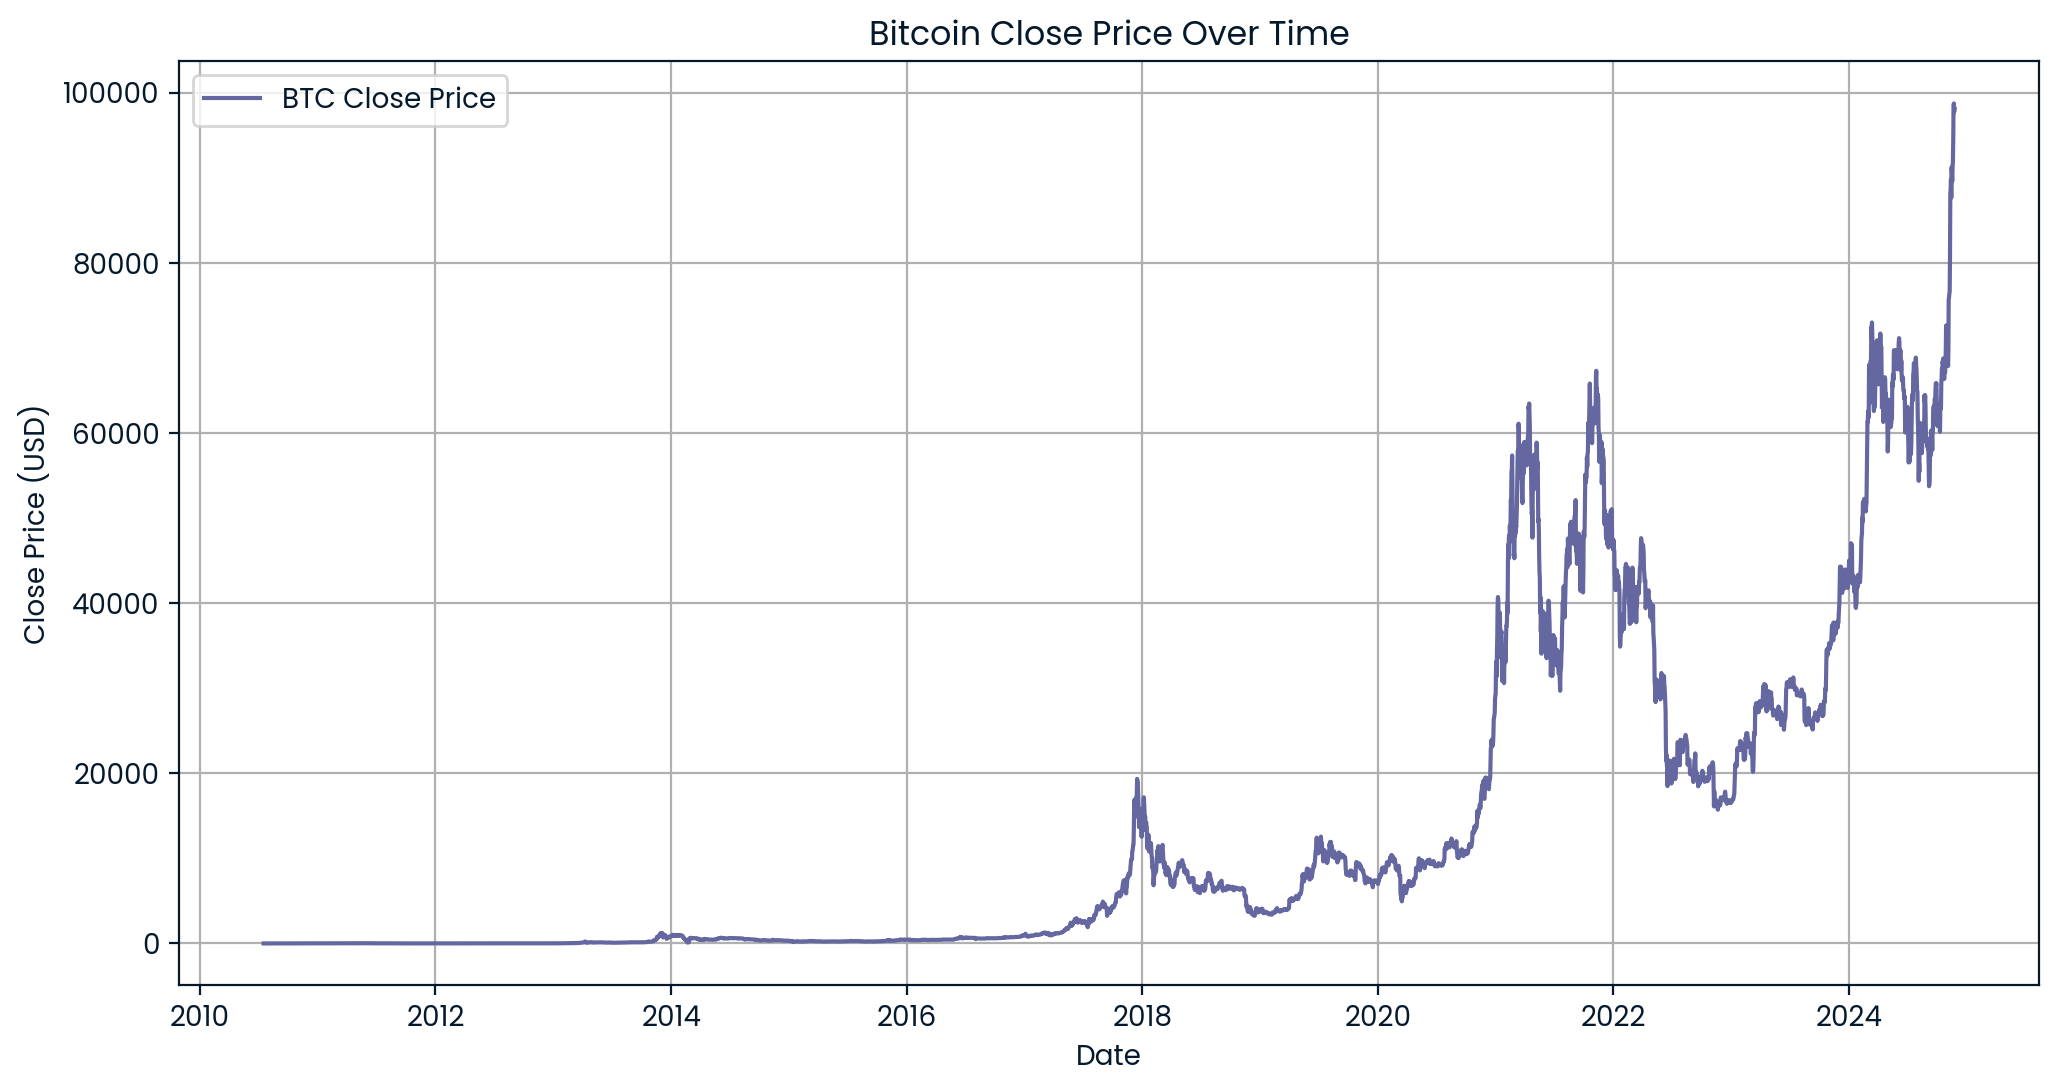

In [9]:
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime format
btc_df['date'] = pd.to_datetime(btc_df['date'])

# Plot the close price
plt.figure(figsize=(12, 6))
plt.plot(btc_df['date'], btc_df['close'], label='BTC Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('Bitcoin Close Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
closing_prices = btc_df['close'].values.reshape(-1, 1)

In [11]:
closing_prices

array([[4.95100e-02],
       [8.58400e-02],
       [8.08000e-02],
       ...,
       [9.87299e+04],
       [9.77374e+04],
       [9.80980e+04]])

In [10]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [11]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

seq_length = 30
X, y = create_sequences(closing_prices, seq_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [12]:
import torch.nn as nn
import torch.optim as optim

class BTCPriceLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=128, num_layers=100, output_size=1, dropout=0.2):
        super(BTCPriceLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Define the model
model = BTCPriceLSTM()

# Instantiate models
print("LSTM Model:", model)

LSTM Model: BTCPriceLSTM(
  (lstm): LSTM(1, 128, num_layers=100, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)


In [13]:
# Define loss and optimizer
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [14]:
# Training loop
num_epochs = 100

# Assuming btc_dataloader is already defined and provides batches of (x_batch, y_batch)
for epoch in range(num_epochs):
    for x_batch, y_batch in train_loader:
        
        # Forward pass
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Print loss for every epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/100], Loss: 11005.0225
Epoch [2/100], Loss: 11002.1631
Epoch [3/100], Loss: 10999.3760
Epoch [4/100], Loss: 10996.6064
Epoch [5/100], Loss: 10993.8398
Epoch [6/100], Loss: 10991.0811
Epoch [7/100], Loss: 10988.3193
Epoch [8/100], Loss: 10985.5586
Epoch [9/100], Loss: 10982.8018
Epoch [10/100], Loss: 10980.0479
Epoch [11/100], Loss: 10977.3057
Epoch [12/100], Loss: 10974.5908
Epoch [13/100], Loss: 10971.9131
Epoch [14/100], Loss: 10969.2617
Epoch [15/100], Loss: 10966.6318
Epoch [16/100], Loss: 10964.0244
Epoch [17/100], Loss: 10961.4600
Epoch [18/100], Loss: 10958.9102
Epoch [19/100], Loss: 10956.3525
Epoch [20/100], Loss: 10953.7773
Epoch [21/100], Loss: 10951.1904
Epoch [22/100], Loss: 10948.5908
Epoch [23/100], Loss: 10945.9844
Epoch [24/100], Loss: 10943.3682
Epoch [25/100], Loss: 10940.7451
Epoch [26/100], Loss: 10938.1240
Epoch [27/100], Loss: 10935.4971
Epoch [28/100], Loss: 10932.8994
Epoch [29/100], Loss: 10930.3789
Epoch [30/100], Loss: 10927.9258
Epoch [31/100], Los

In [15]:
# Save the model
model_save_path = 'model_lstm.pth'
torch.save(model.state_dict(), model_save_path)

In [16]:
btc_df

,ticker,date,open,high,low,close
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921
...,...,...,...,...,...,...
5240,BTC,2024-11-20,91926.30000,94904.00000,91630.90000,94225.50000
5241,BTC,2024-11-21,94225.50000,99048.20000,93840.40000,98446.50000
5242,BTC,2024-11-22,98414.40000,99667.70000,97189.30000,98729.90000
5243,BTC,2024-11-23,98737.00000,99009.70000,97232.20000,97737.40000


In [18]:
# Convert the 'timestamp' column to datetime format
btc_df['timestamp'] = pd.to_datetime(btc_df['date'])

# Set the 'timestamp' column as the index
btc_df.set_index('timestamp', inplace=True)

# Create a new column 'candle_status' to indicate if the closing price is higher than the opening price
btc_df['candle_status'] = np.where(btc_df['close'] > btc_df['open'], 1, 0)

# Calculate the 9-period Exponential Moving Average (EMA)
btc_df['EMA_9'] = ta.ema(btc_df['close'], length=9)

# Calculate the 30-period Exponential Moving Average (EMA)
btc_df['EMA_30'] = ta.ema(btc_df['close'], length=30)

# Compute the 14-period Relative Strength Index (RSI)
btc_df['RSI_14'] = ta.rsi(btc_df['close'], length=14)

# Compute the Rate of Change (ROC) for 1, 10, and 14 periods
btc_df['ROC_1'] = ta.roc(btc_df['close'], length=1)
btc_df['ROC_10'] = ta.roc(btc_df['close'], length=10)
btc_df['ROC_14'] = ta.roc(btc_df['close'], length=14)

In [20]:
data = btc_df.dropna()

In [21]:
data

,ticker,date,open,high,low,close,candle_status,EMA_9,EMA_30,RSI_14,ROC_1,ROC_10,ROC_14
timestamp,,,,,,,,,,,,,
2010-08-15,BTC,2010-08-15,0.06700,0.0670,0.06500,0.06529,0,0.065780,0.063990,53.689099,-2.552239,7.032787,6.857610
2010-08-16,BTC,2010-08-16,0.06529,0.0679,0.06200,0.06550,1,0.065724,0.064087,53.826664,0.321642,5.136437,9.166667
2010-08-17,BTC,2010-08-17,0.06550,0.0769,0.06243,0.07000,1,0.066579,0.064469,56.788770,6.870229,18.644068,16.666667
2010-08-18,BTC,2010-08-18,0.07000,0.0733,0.06700,0.06800,0,0.066864,0.064697,55.097007,-2.857143,11.658456,19.298246
2010-08-19,BTC,2010-08-19,0.06800,0.0680,0.06670,0.06670,0,0.066831,0.064826,53.971522,-1.911765,-6.056338,9.344262
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-20,BTC,2024-11-20,91926.30000,94904.0000,91630.90000,94225.50000,1,89521.287631,80100.604623,79.861145,2.483742,16.819429,24.498738
2024-11-21,BTC,2024-11-21,94225.50000,99048.2000,93840.40000,98446.50000,1,91306.330105,81284.210776,83.102446,4.479679,11.769922,29.692035
2024-11-22,BTC,2024-11-22,98414.40000,99667.7000,97189.30000,98729.90000,1,92791.044084,82409.739113,83.296827,0.287872,11.370948,29.195826


In [ ]:
X, y = create_sequences(closing_prices, seq_length)